In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving purchase.csv to purchase.csv


In [26]:
df=pd.read_csv('purchase.csv')
df

,ID,Age,Gender,Income,Education,Marital Status,Purchased
0,1,22,Male,35,Bachelor,Single,No
1,2,25,Female,40,Master,Single,Yes
2,3,47,Male,85,PhD,Married,Yes
3,4,52,Female,110,Bachelor,Married,No
4,5,46,Male,78,Master,Married,Yes
5,6,56,Female,95,Bachelor,Single,No
6,7,35,Female,60,PhD,Married,Yes
7,8,33,Male,58,Bachelor,Single,No
8,9,29,Female,45,Master,Single,Yes
9,10,41,Male,80,PhD,Married,Yes


In [27]:
le=LabelEncoder()
df['Age_n']=le.fit_transform(df['Age'])
df['Gender_n']=le.fit_transform(df['Gender'])
df['Income_n']=le.fit_transform(df['Income'])
df['Education_n']=le.fit_transform(df['Education'])
df['Marital Status_n']=le.fit_transform(df['Marital Status'])
df['Purchased_n']=le.fit_transform(df['Purchased'])
df

,ID,Age,Gender,Income,Education,Marital Status,Purchased,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,1,22,Male,35,Bachelor,Single,No,0,1,0,0,1,0
1,2,25,Female,40,Master,Single,Yes,1,0,1,1,1,1
2,3,47,Male,85,PhD,Married,Yes,7,1,7,2,0,1
3,4,52,Female,110,Bachelor,Married,No,8,0,9,0,0,0
4,5,46,Male,78,Master,Married,Yes,6,1,5,1,0,1
5,6,56,Female,95,Bachelor,Single,No,9,0,8,0,1,0
6,7,35,Female,60,PhD,Married,Yes,4,0,4,2,0,1
7,8,33,Male,58,Bachelor,Single,No,3,1,3,0,1,0
8,9,29,Female,45,Master,Single,Yes,2,0,2,1,1,1
9,10,41,Male,80,PhD,Married,Yes,5,1,6,2,0,1


In [28]:
df=df.drop(['Age','Gender','Income','Education','Marital Status','Purchased','ID'],axis=1)
df

,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,0,1,0,0,1,0
1,1,0,1,1,1,1
2,7,1,7,2,0,1
3,8,0,9,0,0,0
4,6,1,5,1,0,1
5,9,0,8,0,1,0
6,4,0,4,2,0,1
7,3,1,3,0,1,0
8,2,0,2,1,1,1
9,5,1,6,2,0,1


In [30]:
independent_var=df.drop(['Purchased_n'],axis='columns')
dependent_var=df['Purchased_n']

In [31]:
df

,Age_n,Gender_n,Income_n,Education_n,Marital Status_n,Purchased_n
0,0,1,0,0,1,0
1,1,0,1,1,1,1
2,7,1,7,2,0,1
3,8,0,9,0,0,0
4,6,1,5,1,0,1
5,9,0,8,0,1,0
6,4,0,4,2,0,1
7,3,1,3,0,1,0
8,2,0,2,1,1,1
9,5,1,6,2,0,1


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent_var,dependent_var,test_size=0.3,random_state=42)

In [46]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred=model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:33.33%


In [65]:
new_data=[[3,1,3,0,1]]

In [66]:
prediction=model.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
print("prediction(0=no,1=yes):",prediction[0])

prediction(0=no,1=yes): 0


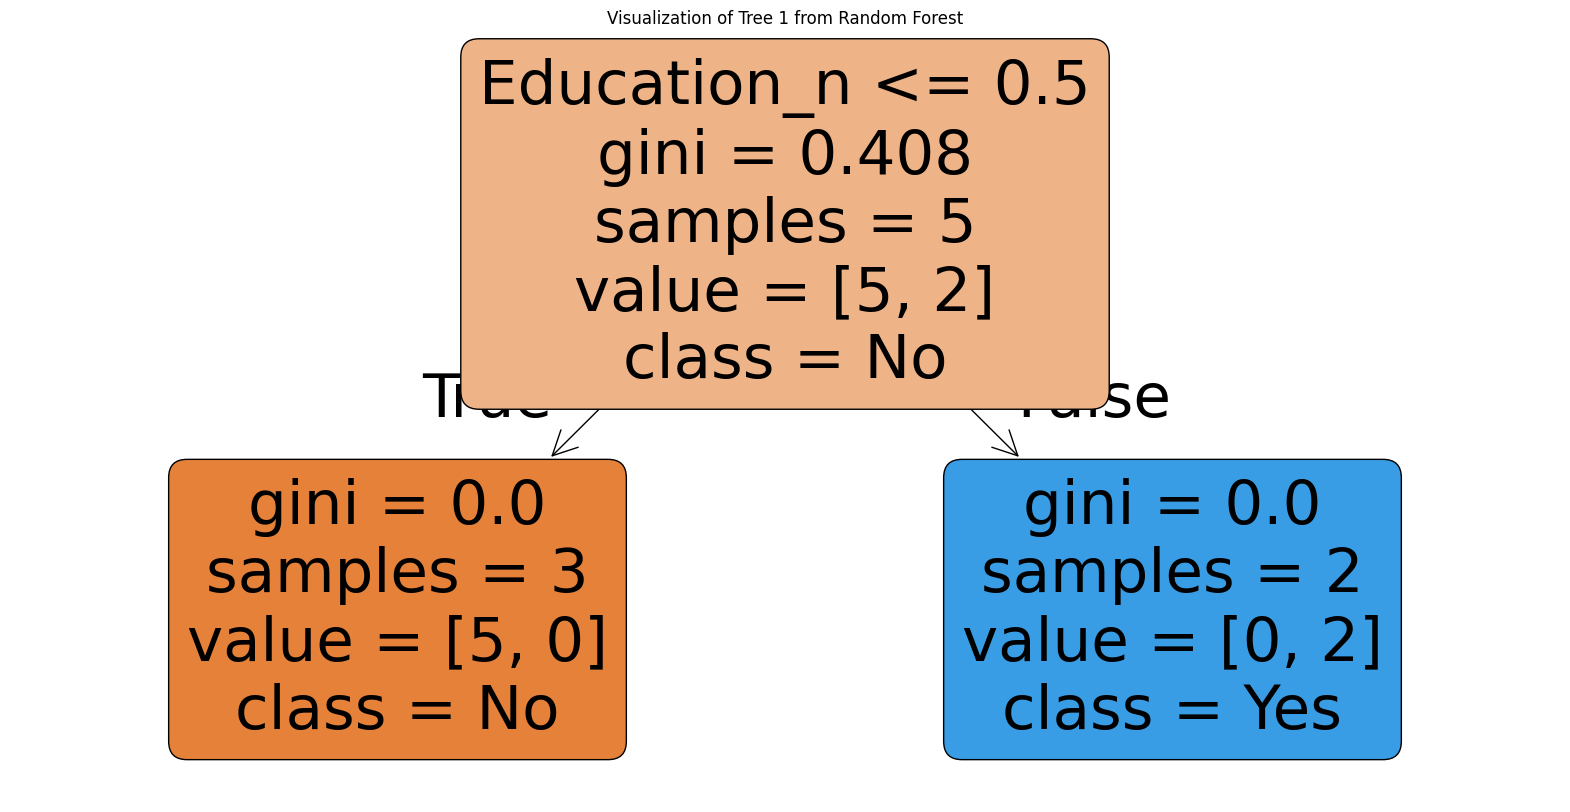

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the first decision tree from your trained Random Forest model
first_tree = model.estimators_[0]

# Visualize the first tree
plt.figure(figsize=(20, 10))
plot_tree(
    first_tree,
    feature_names=independent_var.columns,  # Use your encoded feature column names
    class_names=['No', 'Yes'],             # Assuming 0 = No, 1 = Yes for 'Purchased'
    filled=True,
    rounded=True,
    max_depth=3                            # Optional: limit tree depth for clarity
)
plt.title("Visualization of Tree 1 from Random Forest")
plt.show()

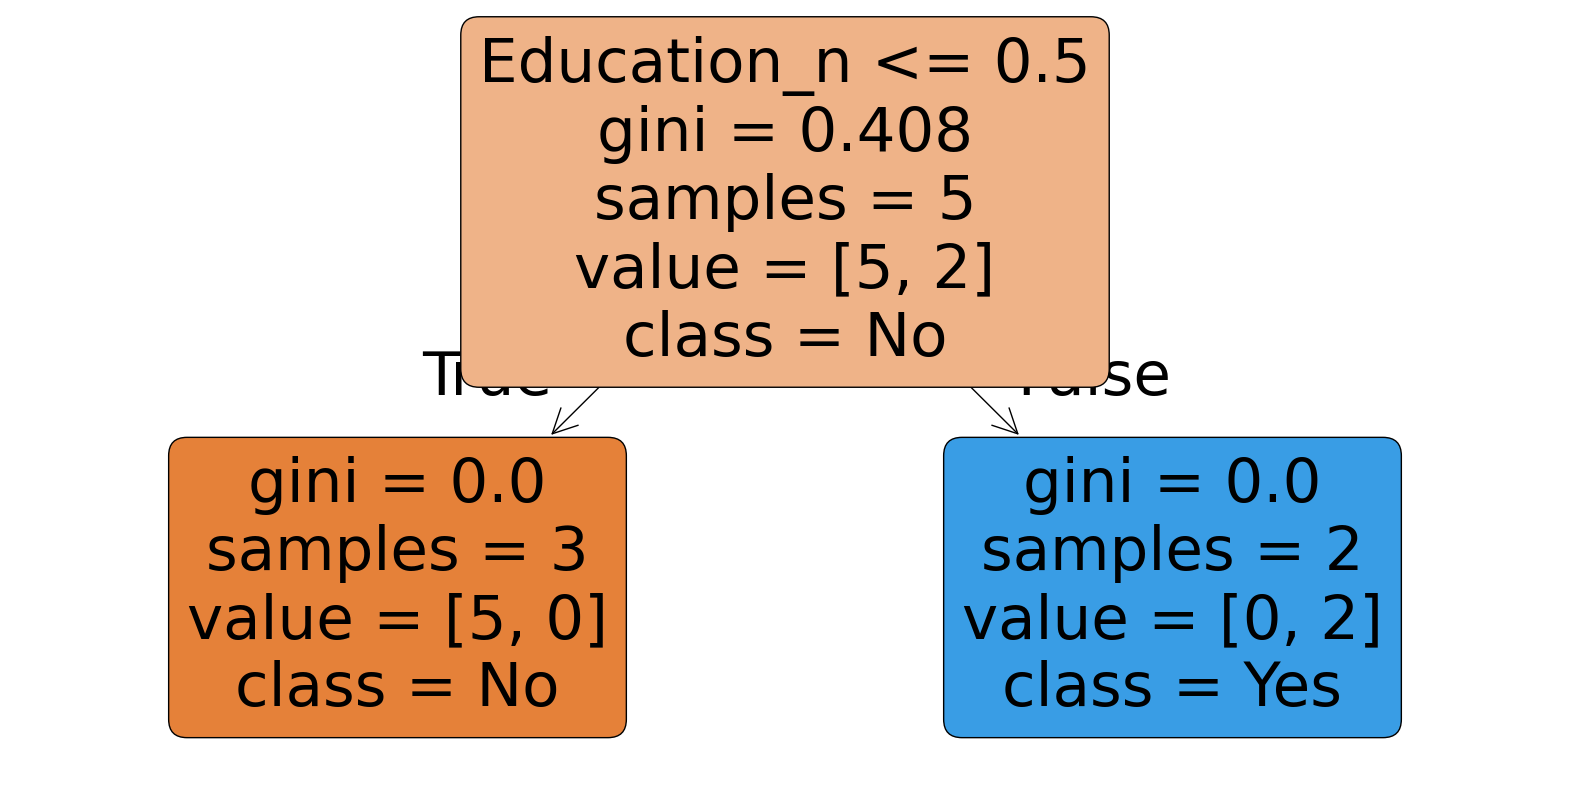

In [69]:
from sklearn.tree import plot_tree
feature_names = ['Age_n', 'Gender_n', 'Income_n', 'Education_n','Marital Status_n']
tree = model.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=feature_names,
          class_names=['No','Yes'],
          filled=True,
          rounded=True)
plt.show()